In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [2]:
df_17to19 = pd.read_csv("./match_data_2017-2019.csv") # 訓練データ
df_17to19

Sec                 Date                  Home                Away  \
0      1  2017-02-25 00:00:00   yokohama-fa-marinos  urawa-red-diamonds   
1      1  2017-02-25 00:00:00       shimizu-s-pulse         vissel-kobe   
2      1  2017-02-25 00:00:00       kashima-antlers            fc-tokyo   
3      1  2017-02-25 00:00:00            sagan-tosu      kashiwa-reysol   
4      2  2017-03-04 00:00:00    urawa-red-diamonds        cerezo-osaka   
..   ...                  ...                   ...                 ...   
552   34  2019-12-07 00:00:00       shimizu-s-pulse          sagan-tosu   
553   34  2019-12-07 00:00:00  nagoya-grampus-eight     kashima-antlers   
554   34  2019-12-07 00:00:00   yokohama-fa-marinos            fc-tokyo   
555   34  2019-12-07 00:00:00          oita-trinita        cerezo-osaka   
556   34  2019-12-07 00:00:00    urawa-red-diamonds         gamba-osaka   

     HomeID  W/L  AwayID  HomeGF  AwayGF Stadium  Attendances  Points/M   GD  \
0         8    1       4       3       2     日産ス        39284      0.83  1.0   
1        11    2      15       0       1    アイスタ        17861      1.17 -6.0   
2         3    2       6       0       1     カシマ        28240      1.67  4.0   
3        17    2       5       1       3    ベアスタ        14355      1.71  1.0   
4         4    1      14       3       1      埼玉        43826      1.50  0.0   
..      ...  ...     ...     ...     ...     ...          ...       ...  ...   
552      11    1      17       1       0    アイスタ        15756      0.60 -3.0   
553      12    2       3       0       1     豊田ス        33133      0.57 -7.0   
554       8    1       6       3       0     日産ス        63854      0.83 -2.0   
555      18    2      14       0       2    昭和電ド        17233      0.50 -2.0   
556       4    2      13       2       3      埼玉        47188      1.71  2.0   

     HomeElo  AwayElo  HomeED  AwayED  
0     1481.0   1576.0     5.0    15.0  
1     1290.0   1416.0    -5.0     5.0  
2     1585.0   1463.0   -10.0     9.0  
3     1389.0   1469.0    -9.0     9.0  
4     1574.0   1395.0    -2.0     0.0  
..       ...      ...     ...     ...  
552   1340.0   1345.0     3.0    -4.0  
553   1338.0   1561.0    -4.0     3.0  
554   1510.0   1469.0     5.0    -5.0  
555   1287.0   1477.0    -6.0     6.0  
556   1471.0   1431.0    -7.0     7.0  

[557 rows x 17 columns]

In [3]:
df_20 = pd.read_csv("./match_data_2020.csv") # テストデータ
df_20

Sec                 Date                  Home                  Away  \
0      1  2020-02-21 00:00:00       shonan-bellmare    urawa-red-diamonds   
1      1  2020-02-22 00:00:00        vegalta-sendai  nagoya-grampus-eight   
2      1  2020-02-22 00:00:00          cerezo-osaka          oita-trinita   
3      1  2020-02-22 00:00:00     kawasaki-frontale            sagan-tosu   
4      1  2020-02-23 00:00:00       shimizu-s-pulse              fc-tokyo   
..   ...                  ...                   ...                   ...   
257   34  2020-12-19 00:00:00           gamba-osaka       shimizu-s-pulse   
258   34  2020-12-19 00:00:00       kashima-antlers          cerezo-osaka   
259   34  2020-12-19 00:00:00  nagoya-grampus-eight   sanfrecce-hiroshima   
260   34  2020-12-19 00:00:00            sagan-tosu          oita-trinita   
261   34  2020-12-19 00:00:00              fc-tokyo           vissel-kobe   

     HomeID  W/L  AwayID  HomeGF  AwayGF Stadium  Attendances  Points/M   GD  \
0        10    2       4       2       3    ＢＭＷス        13071      2.50  3.0   
1         2    0      12       1       1    ユアスタ        13968      2.00  3.0   
2        14    1      18       1       0    ヤンマー        15535      1.75  3.0   
3         7    0      17       0       0     等々力        21117      2.00  4.0   
4        11    2       6       1       3    アイスタ        17549      1.00 -3.0   
..      ...  ...     ...     ...     ...     ...          ...       ...  ...   
257      13    2      11       0       2    パナスタ        15252      1.75  3.0   
258       3    0      14       1       1     カシマ        11251      2.50  6.0   
259      12    1      16       1       0     豊田ス        16825      1.83  2.0   
260      17    0      18       2       2     駅スタ         8966      0.50 -2.0   
261       6    1      15       1       0     味スタ        14373      1.83  3.0   

     HomeElo  AwayElo  HomeED  AwayED  
0     1297.0   1475.0    -4.0     4.0  
1     1362.0   1340.0    -2.0     2.0  
2     1478.0   1285.0     1.0    -2.0  
3     1565.0   1348.0    -4.0     3.0  
4     1334.0   1483.0    -6.0    14.0  
..       ...      ...     ...     ...  
257   1451.0   1335.0    -2.0     6.0  
258   1531.0   1476.0     1.0    -1.0  
259   1419.0   1477.0     8.0   -16.0  
260   1349.0   1327.0     9.0     0.0  
261   1457.0   1382.0     9.0    -3.0  

[262 rows x 17 columns]

In [4]:
clubs = ['consadole-sapporo','vegalta-sendai','kashima-antlers','urawa-red-diamonds','kashiwa-reysol','fc-tokyo','kawasaki-frontale','yokohama-fa-marinos','yokohama-fc','shonan-bellmare','shimizu-s-pulse','nagoya-grampus-eight','gamba-osaka','cerezo-osaka','vissel-kobe','sanfrecce-hiroshima','sagan-tosu','oita-trinita']

In [5]:
df_20["Date"] = pd.to_datetime(df_20["Date"])
df_17to19["Date"] = pd.to_datetime(df_17to19["Date"])

In [6]:
df_20

Sec       Date                  Home                  Away  HomeID  W/L  \
0      1 2020-02-21       shonan-bellmare    urawa-red-diamonds      10    2   
1      1 2020-02-22        vegalta-sendai  nagoya-grampus-eight       2    0   
2      1 2020-02-22          cerezo-osaka          oita-trinita      14    1   
3      1 2020-02-22     kawasaki-frontale            sagan-tosu       7    0   
4      1 2020-02-23       shimizu-s-pulse              fc-tokyo      11    2   
..   ...        ...                   ...                   ...     ...  ...   
257   34 2020-12-19           gamba-osaka       shimizu-s-pulse      13    2   
258   34 2020-12-19       kashima-antlers          cerezo-osaka       3    0   
259   34 2020-12-19  nagoya-grampus-eight   sanfrecce-hiroshima      12    1   
260   34 2020-12-19            sagan-tosu          oita-trinita      17    0   
261   34 2020-12-19              fc-tokyo           vissel-kobe       6    1   

     AwayID  HomeGF  AwayGF Stadium  Attendances  Points/M   GD  HomeElo  \
0         4       2       3    ＢＭＷス        13071      2.50  3.0   1297.0   
1        12       1       1    ユアスタ        13968      2.00  3.0   1362.0   
2        18       1       0    ヤンマー        15535      1.75  3.0   1478.0   
3        17       0       0     等々力        21117      2.00  4.0   1565.0   
4         6       1       3    アイスタ        17549      1.00 -3.0   1334.0   
..      ...     ...     ...     ...          ...       ...  ...      ...   
257      11       0       2    パナスタ        15252      1.75  3.0   1451.0   
258      14       1       1     カシマ        11251      2.50  6.0   1531.0   
259      16       1       0     豊田ス        16825      1.83  2.0   1419.0   
260      18       2       2     駅スタ         8966      0.50 -2.0   1349.0   
261      15       1       0     味スタ        14373      1.83  3.0   1457.0   

     AwayElo  HomeED  AwayED  
0     1475.0    -4.0     4.0  
1     1340.0    -2.0     2.0  
2     1285.0     1.0    -2.0  
3     1348.0    -4.0     3.0  
4     1483.0    -6.0    14.0  
..       ...     ...     ...  
257   1335.0    -2.0     6.0  
258   1476.0     1.0    -1.0  
259   1477.0     8.0   -16.0  
260   1327.0     9.0     0.0  
261   1382.0     9.0    -3.0  

[262 rows x 17 columns]

In [21]:
# 入力データ(Points/M､GD,HomeElo,AwayElo)
X_train=df_17to19.drop(["Sec","Date","W/L","Home","Away","HomeID","AwayID","HomeGF","AwayGF","Stadium","Attendances","HomeED","AwayED"],axis=1).values
X_train

array([[ 8.300e-01,  1.000e+00,  1.481e+03,  1.576e+03],
       [ 1.170e+00, -6.000e+00,  1.290e+03,  1.416e+03],
       [ 1.670e+00,  4.000e+00,  1.585e+03,  1.463e+03],
       ...,
       [ 8.300e-01, -2.000e+00,  1.510e+03,  1.469e+03],
       [ 5.000e-01, -2.000e+00,  1.287e+03,  1.477e+03],
       [ 1.710e+00,  2.000e+00,  1.471e+03,  1.431e+03]])

In [22]:
#  出力データ(勝敗)
y_train =df_17to19["W/L"].values
y_train

array([1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1,

Text(0, 0.5, 'Away Elorating')

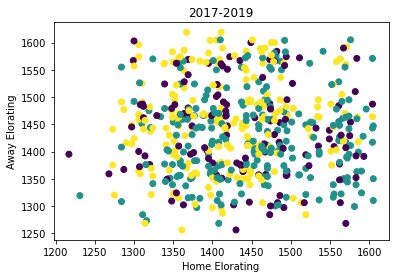

In [23]:
plt.scatter(X_train[:, 2],X_train[:, 3], c = y_train)
plt.title("2017-2019")
plt.xlabel("Home Elorating")
plt.ylabel("Away Elorating")

In [30]:
X_test=df_20.drop(["Sec","Date","W/L","Home","Away","HomeID","AwayID","HomeGF","AwayGF","Stadium","Attendances","HomeED","AwayED"],axis=1).values
X_test

array([[ 2.500e+00,  3.000e+00,  1.297e+03,  1.475e+03],
       [ 2.000e+00,  3.000e+00,  1.362e+03,  1.340e+03],
       [ 1.750e+00,  3.000e+00,  1.478e+03,  1.285e+03],
       ...,
       [ 1.830e+00,  2.000e+00,  1.419e+03,  1.477e+03],
       [ 5.000e-01, -2.000e+00,  1.349e+03,  1.327e+03],
       [ 1.830e+00,  3.000e+00,  1.457e+03,  1.382e+03]])

In [31]:
y_test =df_20["W/L"].values
y_test

array([2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1])

Text(0, 0.5, 'Away Elorating')

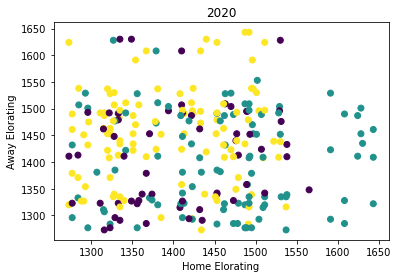

In [32]:
plt.scatter(X_test[:, 2],X_test[:, 3], c=y_test)
plt.title("2020")
plt.xlabel("Home Elorating")
plt.ylabel("Away Elorating")

In [33]:
# ランダムフォレスト
rf= RandomForestClassifier(max_depth=5)  

In [34]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [35]:
y_pred = rf.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 0, 0, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0,
       2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1])

In [36]:
rf.score(X_test,y_test) 

0.49236641221374045

In [37]:
# linear_svm = svm.LinearSVC(max_iter=100000000).fit(X_train,y_train)

In [38]:
# linear_svm.predict(X_test) #予測結果

In [39]:
# y_test # 実際の結果(答え)

In [40]:
# linear_svm.score(X_test,y_test) # 精度

In [41]:
#  HomeElo と AwayEloのみを使う

In [43]:
X_train = df_17to19.drop(["Sec","Date","W/L","Home","Away","HomeID","AwayID","HomeGF","AwayGF","Stadium","Attendances","Attendances","Points/M","GD","HomeED","AwayED"],axis=1).values
X_train

array([[1481., 1576.],
       [1290., 1416.],
       [1585., 1463.],
       ...,
       [1510., 1469.],
       [1287., 1477.],
       [1471., 1431.]])

In [44]:
X_test = df_20.drop(["Sec","Date","W/L","Home","Away","HomeID","AwayID","HomeGF","AwayGF","Stadium","Attendances","Attendances","Points/M","GD","HomeED","AwayED"],axis=1).values
X_test

array([[1297., 1475.],
       [1362., 1340.],
       [1478., 1285.],
       [1565., 1348.],
       [1334., 1483.],
       [1502., 1553.],
       [1522., 1439.],
       [1453., 1479.],
       [1323., 1371.],
       [1284., 1333.],
       [1423., 1496.],
       [1591., 1529.],
       [1293., 1354.],
       [1470., 1504.],
       [1413., 1491.],
       [1479., 1323.],
       [1354., 1470.],
       [1423., 1294.],
       [1333., 1413.],
       [1491., 1284.],
       [1504., 1293.],
       [1371., 1453.],
       [1496., 1591.],
       [1591., 1423.],
       [1284., 1413.],
       [1323., 1453.],
       [1333., 1491.],
       [1479., 1371.],
       [1470., 1529.],
       [1504., 1496.],
       [1529., 1504.],
       [1371., 1333.],
       [1496., 1470.],
       [1491., 1479.],
       [1423., 1293.],
       [1453., 1284.],
       [1413., 1323.],
       [1293., 1529.],
       [1453., 1491.],
       [1333., 1323.],
       [1394., 1496.],
       [1479., 1413.],
       [1284., 1371.],
       [147

In [45]:
y_train =df_17to19["W/L"].values
y_train

array([1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2, 2, 1,
       0, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 1, 2, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 0, 2, 1, 2, 2, 0, 0, 1, 0, 2, 2, 2, 2, 1, 1, 2, 1, 0,
       0, 2, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 0, 1, 0, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 2, 1, 0, 2, 1,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       1, 0, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 1, 0, 0, 1, 2,
       2, 1, 2, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2,
       0, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 1, 0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 0, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2,
       0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 2, 2, 1, 0, 2, 1, 2, 2, 0, 1, 2,
       0, 0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 1, 1, 2, 0, 1, 0, 2, 0, 1, 1, 1, 2, 2, 1,

In [46]:
y_test =df_20["W/L"].values
y_test

array([2, 0, 1, 0, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 1, 0, 2, 0, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2,
       2, 1, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 0, 1, 2, 1, 1, 0, 1,
       0, 2, 0, 0, 1, 2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 0, 1, 2,
       1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 2, 0, 0, 1, 1,
       1, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 2, 2, 1, 0, 0,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 0, 2, 2, 2, 1, 2, 2, 0, 2, 0, 1, 0, 1])

In [52]:
# ランダムフォレスト
rf= RandomForestClassifier(max_depth=5)  

In [53]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5)

In [54]:
y_pred = rf.predict(X_test)
y_pred

array([2, 1, 0, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 1, 2,
       2, 1, 2, 1, 0, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2,
       1, 2, 2, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0,
       2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 2,
       1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1])

In [55]:
rf.score(X_test,y_test) 

0.4961832061068702

### 考察
HomeElo,AwayEloを特徴量に含めることで精度は40%台前半から50%程まで向上した｡ 
また､Points/M,GDを特徴量から外しても精度はほどんど変わらなかったため､Points/M,GDが有効な特徴量ではない可能性が高い
Eloratingの1ヶ月ごとの差分(EloratingDifference)を食べさせてみる

In [88]:
# EloratingDifferenceのみ
X_train = df_17to19[["HomeED","AwayED"]].values
X_train

array([[  5.,  15.],
       [ -5.,   5.],
       [-10.,   9.],
       ...,
       [  5.,  -5.],
       [ -6.,   6.],
       [ -7.,   7.]])

In [89]:
X_test = df_20[["HomeED","AwayED"]].values
X_test

array([[ -4.,   4.],
       [ -2.,   2.],
       [  1.,  -2.],
       [ -4.,   3.],
       [ -6.,  14.],
       [  8.,  -8.],
       [ 12.,   8.],
       [ 14.,   1.],
       [-11.,  31.],
       [ -1., -15.],
       [  2.,  13.],
       [ 26., -24.],
       [ -4.,  -8.],
       [ -5., -18.],
       [ -7., -11.],
       [  1., -11.],
       [ -8.,  -5.],
       [  2.,  -9.],
       [-15.,  -7.],
       [-11.,  -1.],
       [-18.,  -4.],
       [ 31.,  14.],
       [ 13.,  26.],
       [ 26.,   2.],
       [ -1.,  -7.],
       [-11.,  14.],
       [-15., -11.],
       [  1.,  31.],
       [ -5., -24.],
       [-18.,  13.],
       [-24., -18.],
       [ 31., -15.],
       [ 13.,  -5.],
       [-11.,   1.],
       [  2.,  -4.],
       [ 14.,  -1.],
       [ -7., -11.],
       [ -4., -24.],
       [ 14., -11.],
       [-15., -11.],
       [ 27.,  13.],
       [  1.,  -7.],
       [ -1.,  31.],
       [ -5.,   2.],
       [ -8.,  26.],
       [ 27., -18.],
       [-11.,  -1.],
       [-24.,

In [90]:
rf= RandomForestClassifier(max_depth=5)  
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test) 

0.5343511450381679

In [91]:
X_train = df_17to19[["HomeElo","AwayElo","HomeED","AwayED"]].values
X_train

array([[1481., 1576.,    5.,   15.],
       [1290., 1416.,   -5.,    5.],
       [1585., 1463.,  -10.,    9.],
       ...,
       [1510., 1469.,    5.,   -5.],
       [1287., 1477.,   -6.,    6.],
       [1471., 1431.,   -7.,    7.]])

In [92]:
X_test = df_20[["HomeElo","AwayElo","HomeED","AwayED"]].values
X_test

array([[ 1.297e+03,  1.475e+03, -4.000e+00,  4.000e+00],
       [ 1.362e+03,  1.340e+03, -2.000e+00,  2.000e+00],
       [ 1.478e+03,  1.285e+03,  1.000e+00, -2.000e+00],
       ...,
       [ 1.419e+03,  1.477e+03,  8.000e+00, -1.600e+01],
       [ 1.349e+03,  1.327e+03,  9.000e+00,  0.000e+00],
       [ 1.457e+03,  1.382e+03,  9.000e+00, -3.000e+00]])

In [93]:
rf= RandomForestClassifier(max_depth=5)  
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X_test,y_test) 

0.6030534351145038

### 考察

Eloratingの差分のみでも50%超えの精度が出るので､この特徴量()はクラブの調子･勢いを多少なりとも数値化できていると考えられる｡
Eloratingの値とその差分を学習させることで､過去最高の60%程の精度が出た